# Parts of Speech

Here, we'll be using the NLTK to guess the parts of speech for our texts. Common parts of speech for English include nouns (people, places, things), verbs (actions), and adjectives (descriptions). Here's a more complete list of parts of speech, taken from [this UPenn page](https://ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html). The abbreviations here are those used by the NLTK POS tagger, `nltk.pos_tag()`. 

1.	CC	Coordinating conjunction
2.	CD	Cardinal number
3.	DT	Determiner
4.	EX	Existential there
5.	FW	Foreign word
6.	IN	Preposition or subordinating conjunction
7.	JJ	Adjective
8.	JJR	Adjective, comparative
9.	JJS	Adjective, superlative
10.	LS	List item marker
11.	MD	Modal
12.	NN	Noun, singular or mass
13.	NNS	Noun, plural
14.	NNP	Proper noun, singular
15.	NNPS	Proper noun, plural
16.	PDT	Predeterminer
17.	POS	Possessive ending
18.	PRP	Personal pronoun
19.	PRP\$	Possessive pronoun
20.	RB	Adverb
21.	RBR	Adverb, comparative
22.	RBS	Adverb, superlative
23.	RP	Particle
24.	SYM	Symbol
25.	TO	to
26.	UH	Interjection
27.	VB	Verb, base form
28.	VBD	Verb, past tense
29.	VBG	Verb, gerund or present participle
30.	VBN	Verb, past participle
31.	VBP	Verb, non-3rd person singular present
32.	VBZ	Verb, 3rd person singular present
33.	WDT	Wh-determiner
34.	WP	Wh-pronoun
35.	WP\$	Possessive wh-pronoun
36.	WRB	Wh-adverb

Ok. First, import all our usual stuff, and also `pos_tag()`. 

In [10]:
import nltk
from nltk import word_tokenize, sent_tokenize, pos_tag, pos_tag_sents, ngrams
from collections import Counter
import numpy as np
import pandas as pd
%matplotlib inline

Tokenize a test sentence. 

In [11]:
foxy = word_tokenize("The quick brown fox jumped over the lazy dogs.")

Now POS tag it (i.e. ask the NLTK to guess the parts of speech for each word): 

In [12]:
pos_tag(foxy)

[('The', 'DT'),
 ('quick', 'JJ'),
 ('brown', 'NN'),
 ('fox', 'NN'),
 ('jumped', 'VBD'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('lazy', 'JJ'),
 ('dogs', 'NNS'),
 ('.', '.')]

Note how this data structure is a list of tuples. 

## On Tuples

Tuples use parentheses: `(1, 2)`. Tuples are pretty much like lists, only they're immutable, which means you can't append to them or change them in any way. 

In [13]:
(1,2)

(1, 2)

In [14]:
(1,2).append(1)

AttributeError: 'tuple' object has no attribute 'append'

In [ ]:
("Apples", "Bananas")[0]

Now we'll get our text (only Betteredge this time, as a test). 

In [ ]:
moonstone = open('/home/jon/Code/course-computational-literary-analysis/moonstone.md').read().lower()

In [ ]:
moonstoneParts = moonstone.split('%%%%%')

In [15]:
bet = moonstoneParts[1]

In [16]:
betTokens = word_tokenize(bet)

In [17]:
len(betTokens)

94881

And we'll POS tag it, which creates a list of 2-tuples. 

In [18]:
betPOS = pos_tag(betTokens)

In [19]:
betPOS[:30]

[('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('chapter', 'NN'),
 ('i', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('first', 'JJ'),
 ('part', 'NN'),
 ('of', 'IN'),
 ('robinson', 'NN'),
 ('crusoe', 'NN'),
 (',', ','),
 ('at', 'IN'),
 ('page', 'NN'),
 ('one', 'CD'),
 ('hundred', 'CD'),
 ('and', 'CC'),
 ('twenty-nine', 'JJ'),
 (',', ','),
 ('you', 'PRP'),
 ('will', 'MD'),
 ('find', 'VB'),
 ('it', 'PRP'),
 ('thus', 'RB'),
 ('written', 'VBN'),
 (':', ':'),
 ('“', 'NN'),
 ('now', 'RB'),
 ('i', 'VBZ')]

We can get the first column of these tuples (i.e., the words themseleves), using a list comprehension like the one below. And we can get a list of all the POSes the same way. 

In [20]:
words = [pair[0] for pair in betPOS]
pos = [pair[1] for pair in betPOS]

In [21]:
pos[:10]

['#', '#', '#', 'NN', 'NN', 'IN', 'DT', 'JJ', 'NN', 'IN']

We can also count up all the parts of speech with `Counter()`. 

In [27]:
Counter(pos).most_common(30)

[('NN', 16627),
 ('IN', 10673),
 ('DT', 8058),
 (',', 6281),
 ('JJ', 6181),
 ('VBD', 5567),
 ('PRP', 5512),
 ('.', 4198),
 ('VB', 3963),
 ('RB', 3913),
 ('PRP$', 2859),
 ('TO', 2666),
 ('CC', 2474),
 ('NNS', 2362),
 ('VBN', 2095),
 ('VBP', 1804),
 ('VBG', 1657),
 ('NNP', 1397),
 ('VBZ', 1241),
 ('MD', 978),
 ('WRB', 531),
 ('WP', 497),
 (':', 494),
 ('RP', 475),
 ('CD', 438),
 ('WDT', 390),
 ('(', 212),
 (')', 212),
 ('EX', 191),
 ('JJR', 184)]

What if we wanted to make a list of all the adjectives? We could write a function like this: 

In [23]:
def getAdj(taggedText): 
    adjectives = []
    for pair in taggedText: 
        word = pair[0]
        pos = pair[1]
        if pos == 'JJ': 
            adjectives.append(word)
    return adjectives

In [24]:
betAdj = getAdj(betPOS)

Now we can look at the most frequent adjectives, again using `Counter()`: 

In [26]:
Counter(betAdj).most_common(20)

[('i', 391),
 ('’', 238),
 ('sergeant', 188),
 ('own', 172),
 ('miss', 170),
 ('mr.', 154),
 ('”', 146),
 ('little', 129),
 ('other', 120),
 ('“', 119),
 ('s', 103),
 ('last', 102),
 ('good', 99),
 ('first', 90),
 ('young', 81),
 ('next', 70),
 ('old', 63),
 ('lady', 59),
 ('poor', 56),
 ('present', 53)]

We can generalize that function to get any type of POS: 

In [28]:
def getPOS(taggedText, posNeedle): 
    adjectives = []
    for pair in taggedText: 
        word = pair[0]
        pos = pair[1]
        if pos == posNeedle: 
            adjectives.append(word)
    return adjectives

And we can use it to get the most common, say, suplative adverbs: 

In [29]:
Counter(getPOS(betPOS, 'RBS')).most_common(20)

[('most', 39), ('mr.', 2)]

## N-grams

N-grams are groups of n words, where n is an integer.

 - Unigrams: one word ("and")
 - Bigrams: two words ("and", "the")
 - Trigrams: three words ("because", "of", "the")

We can use n-grams to find all kinds of patterns in texts. For example, Betteredge's trigrams: 

In [30]:
betTrigrams = list(ngrams(betTokens, 3))

In [31]:
Counter(betTrigrams).most_common(20)

[(('.', '“', 'i'), 108),
 ((',', '”', 'says'), 97),
 (('don', '’', 't'), 93),
 (('?', '”', '“'), 87),
 ((',', '”', 'he'), 77),
 (('said', ',', '“'), 73),
 (('”', 'he', 'said'), 70),
 ((',', '”', 'i'), 68),
 (('mr.', 'franklin', ','), 65),
 (('said', '.', '“'), 64),
 (('lady', '’', 's'), 63),
 (('?', '”', 'i'), 62),
 (('”', 'i', 'said'), 57),
 ((',', 'sir', ','), 57),
 (('the', 'sergeant', ','), 56),
 (('can', '’', 't'), 55),
 ((',', 'and', 'the'), 55),
 ((',', 'in', 'the'), 54),
 (('franklin', '’', 's'), 53),
 (('mr.', 'franklin', '’'), 52)]

We can also use trigrams in conjunction with POS tagging to find fuzzy patterns, like "in the X," where X is a noun of some sort: 

In [32]:
def inTheX(taggedText):
    inTheXs = []
    trigrams = ngrams(taggedText, 3)
    for trigram in trigrams: 
        if trigram[0][0] == 'in': 
            if trigram[1][0] == 'the': 
                if trigram[2][1] in ['NN', 'NNS', 'NNP']: 
                    inTheXs.append(trigram[0][0] + ' ' + trigram[1][0] + ' ' + trigram[2][0] )
    return inTheXs

In [33]:
inTheX(betPOS)[:10]

['in the interests',
 'in the form',
 'in the house',
 'in the meantime',
 'in the morning',
 'in the afternoon',
 'in the garden',
 'in the time',
 'in the house',
 'in the character']

We can also use the techniques we learned yesterday (see the 06-Narrative-Time notebook) to plot certain parts of speech along narrative time (of Betteredge's narrative, at least). First, make a binary representation of whether each word is an adjective: 

In [34]:
isAdj = [1 if p == 'JJ' else 0 for p in pos]

Then make it into an array, split the array, sum each segment, and then plot it as a Pandas series: 

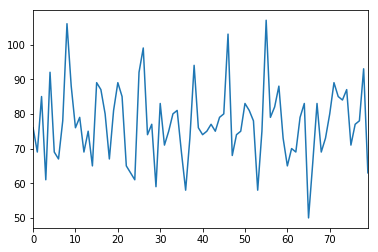

In [36]:
pd.Series([sum(l) for l in (np.array_split(np.array(isAdj), 80))]).plot()